In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#  1. Load the data into the pandas environment and identify some basic details of the dataset.

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
data.shape

(9, 7)

In [7]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [8]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [10]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

There are missing values in this dataset

# 2. Reset the index as "name".

In [11]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [12]:
data=data.set_index("name")
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [13]:
data.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [14]:
data.loc[data['department'].isin(['Sales', 'Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [15]:
data.loc[(data["performance_score"]>700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score.

In [17]:
data.loc[(data["performance_score"]>500) & (data["performance_score"]<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [19]:
data['age']=data['age'].fillna(data['age'].median())
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [20]:
data['gender']= data['gender'].fillna(data['gender'].mode()[0])
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [22]:
data['income']= data['income'].fillna(data['income'].mean())
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Boxplot of performance_score')

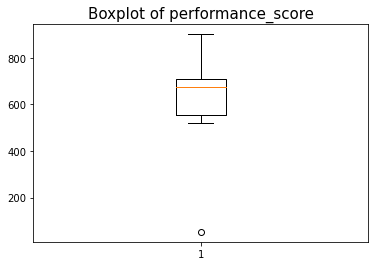

In [23]:

plt.boxplot(data["performance_score"])
plt.title("Boxplot of performance_score",fontsize=15)

In [24]:
q1=np.percentile(data["performance_score"],25)
q3=np.percentile(data["performance_score"],75)
IQR=q3-q1
print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
low_lim=q1-1.5*IQR
high_lim=q3+1.5*IQR
outlier1=data.loc[(data["performance_score"]>high_lim)]
outlier2=data.loc[(data["performance_score"]<low_lim)]
print("The outliers are",outlier1,outlier2)
outlier1_index=outlier1.index
outlier2_index=outlier2.index

Q1 = 556.0
Q3 = 711.0
IQR = 155.0
The outliers are Empty DataFrame
Columns: [age, income, gender, department, grade, performance_score]
Index: []                age        income gender  department grade  performance_score
name                                                                        
James Authur  54.0  52857.142857      F  Operations    G3                 53


In [25]:
data1=data.drop(outlier1_index)
data2=data1.drop(outlier2_index)
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                8 non-null      float64
 1   income             8 non-null      float64
 2   gender             8 non-null      object 
 3   department         8 non-null      object 
 4   grade              8 non-null      object 
 5   performance_score  8 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 448.0+ bytes


# 9. Check the gender column and do Dummy encoding.

In [27]:
dummy_data2 = pd.get_dummies(data2, columns=["gender"])
dummy_data2

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score.

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
std_score=sc.fit_transform(data2[["performance_score"]])
data2.loc[:,["performance_score"]]=std_score
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,0.392262
S Kumar,45.0,16000.000000,F,Finance,G0,-1.475872
Jack Morgan,32.0,35000.000000,M,Finance,G2,-0.058667
Ying Chin,45.0,65000.000000,F,Sales,G3,-1.144578
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,0.281831
Satyam Sharma,45.0,62000.000000,F,Sales,G3,-0.288733
Josh Wills,54.0,52000.000000,F,Finance,G3,2.030331
Leo Duck,23.0,98000.000000,M,Sales,G4,0.263425
